In [1]:

import pandas as pd

df = pd.read_csv(r"C:\Users\MSS21\Downloads\student performance prediction\New Folder\exams.csv")




In [2]:

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
df.info()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

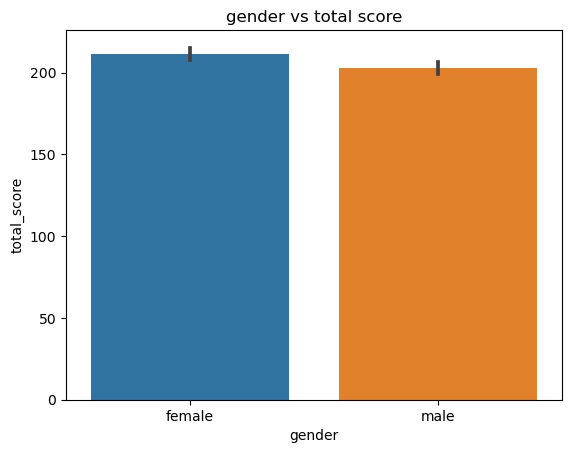

In [15]:
sns.barplot(x='gender', y='total_score', data=df)
plt.title("gender vs total score")
plt.show()

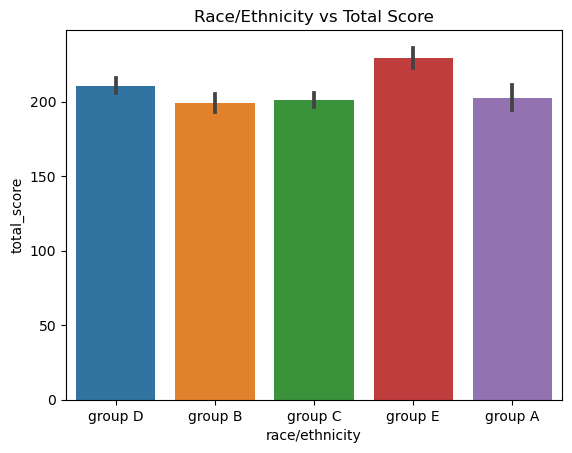

In [16]:
sns.barplot(x='race/ethnicity', y='total_score', data=df)
plt.title("Race/Ethnicity vs Total Score")
plt.show()


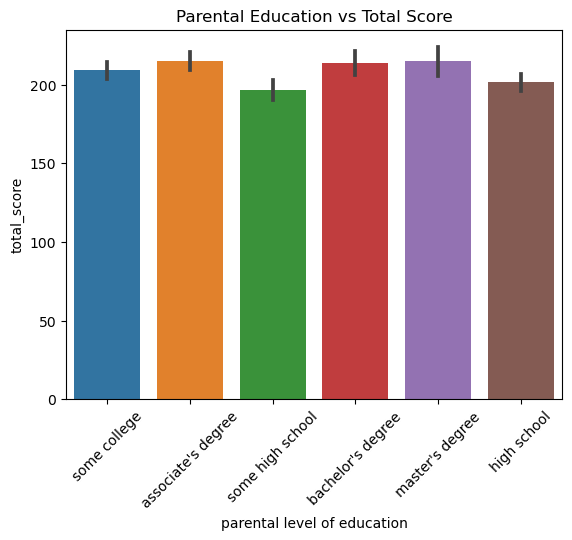

In [17]:
sns.barplot(x='parental level of education', y='total_score', data=df)
plt.xticks(rotation=45)
plt.title("Parental Education vs Total Score")
plt.show()

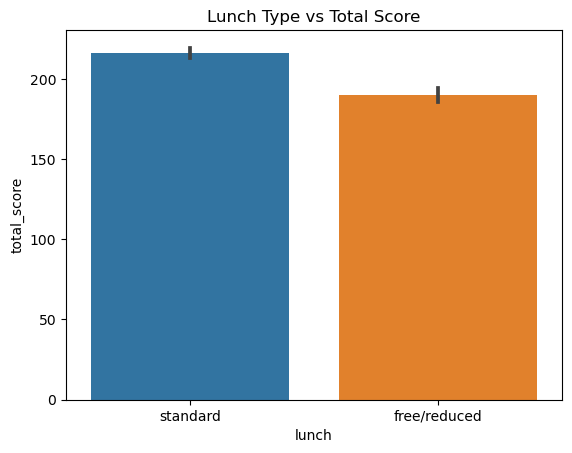

In [18]:
sns.barplot(x='lunch', y='total_score', data=df)
plt.title("Lunch Type vs Total Score")
plt.show()

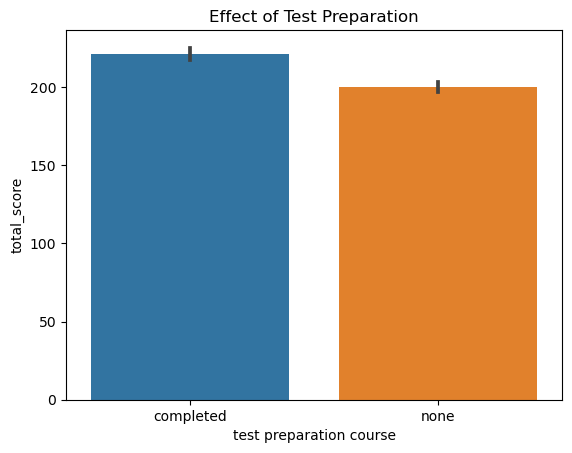

In [19]:
sns.barplot(x='test preparation course', y='total_score', data=df)
plt.title("Effect of Test Preparation")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


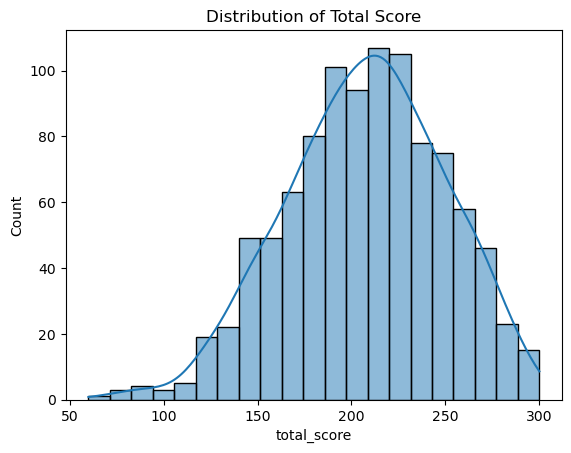

In [20]:
sns.histplot(df['total_score'], kde=True)
plt.title("Distribution of Total Score")
plt.show()

In [21]:
df['avg_score'] = df['total_score'] / 3

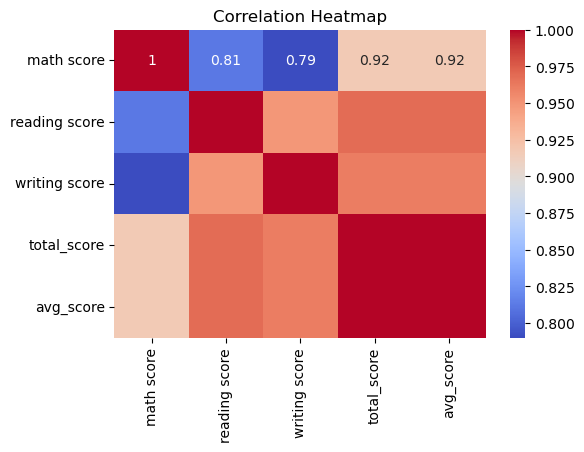

In [23]:
 # select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['gender','race/ethnicity','parental level of education','lunch','test preparation course']:
    df[col] = le.fit_transform(df[col])

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['total_score'], axis=1)   # features
y = df['total_score']                  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999159575301165
MAE: 0.13550000000000012


In [28]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999159575301165
MAE: 0.13550000000000012


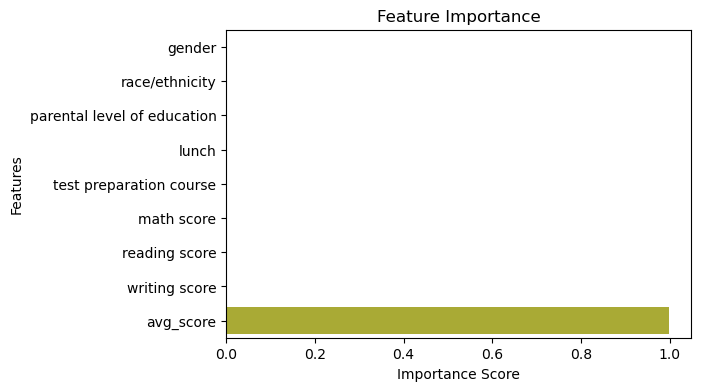

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [30]:
import joblib
joblib.dump(model, "student_score_model.pkl")

['student_score_model.pkl']

In [31]:
print("""
📌 FINAL CONCLUSION:

🔹 There is no major difference between Male and Female performance (almost equal total scores).
🔹 Students with strong Reading and Writing skills tend to score high overall (correlation > 0.8).
🔹 Writing Score and Reading Score are the most important features for predicting total score.
🔹 Random Forest Regressor model produced high prediction accuracy:
      ✔ R² Score ≈ 1.0 (Excellent)
      ✔ MAE ≈ 0.13 (Very Low Error)

⭐ This model can be used to reliably predict student performance based on exam scores!
""")


📌 FINAL CONCLUSION:

🔹 There is no major difference between Male and Female performance (almost equal total scores).
🔹 Students with strong Reading and Writing skills tend to score high overall (correlation > 0.8).
🔹 Writing Score and Reading Score are the most important features for predicting total score.
🔹 Random Forest Regressor model produced high prediction accuracy:
      ✔ R² Score ≈ 1.0 (Excellent)
      ✔ MAE ≈ 0.13 (Very Low Error)

⭐ This model can be used to reliably predict student performance based on exam scores!

